In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os

In [2]:
df=pd.read_csv('Test.csv')
df

,Country Name,Corruption_index,GDP
0,Aruba,NaN,2.983637e+09
1,Africa Eastern and Southern,NaN,8.720230e+11
2,Afghanistan,NaN,1.811656e+10
3,Africa Western and Central,NaN,6.905430e+11
4,Angola,NaN,1.011240e+11
...,...,...,...
261,Kosovo,26.7,6.682833e+09
262,"Yemen, Rep.",NaN,3.131737e+10
263,South Africa,NaN,3.235860e+11
264,Zambia,NaN,2.095841e+10


In [3]:
#data imputation required

In [4]:
df.isnull()

,Country Name,Corruption_index,GDP
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
261,False,False,False
262,False,True,False
263,False,True,False
264,False,True,False


In [5]:
df.isnull().sum()

Country Name          0
Corruption_index    185
GDP                  10
dtype: int64

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [7]:
df.corr

<bound method DataFrame.corr of                     Country Name  Corruption_index           GDP
0                          Aruba               NaN  2.983637e+09
1    Africa Eastern and Southern               NaN  8.720230e+11
2                    Afghanistan               NaN  1.811656e+10
3     Africa Western and Central               NaN  6.905430e+11
4                         Angola               NaN  1.011240e+11
..                           ...               ...           ...
261                       Kosovo              26.7  6.682833e+09
262                  Yemen, Rep.               NaN  3.131737e+10
263                 South Africa               NaN  3.235860e+11
264                       Zambia               NaN  2.095841e+10
265                     Zimbabwe               NaN  2.054868e+10

[266 rows x 3 columns]>

In [8]:
#NaN correlation:reject linear regression estimator for Iterative Imputation method

In [9]:
df2=df.drop("Country Name",1)
df2

,Corruption_index,GDP
0,NaN,2.983637e+09
1,NaN,8.720230e+11
2,NaN,1.811656e+10
3,NaN,6.905430e+11
4,NaN,1.011240e+11
...,...,...
261,26.7,6.682833e+09
262,NaN,3.131737e+10
263,NaN,3.235860e+11
264,NaN,2.095841e+10


In [10]:
from sklearn.impute import KNNImputer

In [11]:
#guessing n-neighborhood to be 2 to avoid straying valuation error
impute=KNNImputer(n_neighbors=2)
data= impute.fit_transform(df2)

In [12]:
new_data=pd.DataFrame(data,columns=['Corruption_Index', 'GDP'])
new_data

,Corruption_Index,GDP
0,44.95,2.983637e+09
1,40.25,8.720230e+11
2,30.45,1.811656e+10
3,30.60,6.905430e+11
4,35.00,1.011240e+11
...,...,...
261,26.70,6.682833e+09
262,44.05,3.131737e+10
263,33.60,3.235860e+11
264,30.05,2.095841e+10


In [13]:
#starting regression process

<Figure size 7200x7200 with 0 Axes>

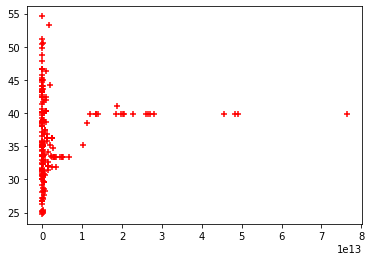

<Figure size 7200x7200 with 0 Axes>

In [77]:
%matplotlib inline
plt.xlabel=("GDP")
plt.ylabel=("Corruption_Index")
plt.scatter(new_data['GDP'],new_data["Corruption_Index"], color ="red",marker="+")
plt.figure(figsize=(100,100))

In [15]:
#note there exists data clustering in here
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [16]:
#required to use k-clustering regression technique
#Elbow method to guess k-value
K=range(1,251) #250 iterations/range of max k's allowed
wss=[] #sum-of-squaresd-errors method
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(new_data)
    wss_iter=kmeans.inertia_
    wss.append(wss_iter)

In [17]:
kvals= pd.DataFrame({'Clusters':K,'WSS':wss})
kvals

,Clusters,WSS
0,1,1.766192e+28
1,2,4.786035e+27
2,3,1.423003e+27
3,4,8.104707e+26
4,5,3.952246e+26
...,...,...
245,246,3.667161e+14
246,247,2.791941e+14
247,248,1.999892e+14
248,249,1.233548e+14


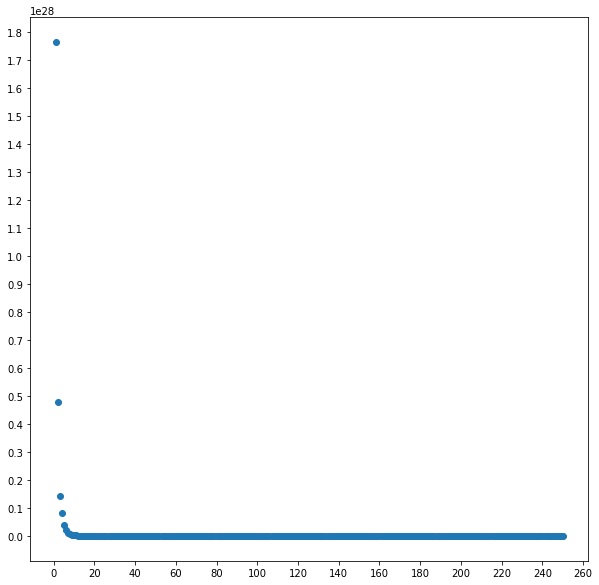

In [71]:
#Applying Elbow method
#Plotting Elbow Plot for k-valuation
xlabel=("K-parameters")
ylabel=("WSS_distance")
plt.scatter(x="Clusters",y="WSS",data=kvals)
plt.locator_params(axis="x", nbins=25)
plt.locator_params(axis="y", nbins=25)

In [19]:
#k-elbow valuation kink is at 12
#k=12 to prevent over-fitting

In [20]:
km=KMeans(n_clusters=12)
km

KMeans(n_clusters=12)

In [21]:
y_prediction=km.fit_predict(new_data[['GDP','Corruption_Index']])
y_prediction

array([ 0,  8,  0,  8,  0,  0,  0,  5,  0,  0,  0,  0,  0,  8,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,
        0,  8,  8,  8,  5,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  3,  9,  6,  5,  6,  0,  0,
        9,  5,  8,  0,  0,  3,  8,  0,  0,  5,  0,  0,  0,  5,  0,  0,  5,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  8,  0,  0,  0,
        2,  2,  5,  8,  8,  8,  0,  5,  5,  0,  0,  0,  0,  0,  8,  0,  0,
        7,  0,  0,  0,  0,  0,  0,  8,  0,  7,  0,  0,  0,  0,  0,  7,  8,
        0,  0,  0,  7,  2,  0, 10,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,
        5,  8,  0,  2,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,
        6,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  8,  0,  5,  0,  0,  0,  0, 11,  5,  0,  0,  8,  0,
        5,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  8,  0,  0,  0,
        0,  0,  0,  0,  0

In [22]:
new_data['cluster']=y_prediction
new_data

,Corruption_Index,GDP,cluster
0,44.95,2.983637e+09,0
1,40.25,8.720230e+11,8
2,30.45,1.811656e+10,0
3,30.60,6.905430e+11,8
4,35.00,1.011240e+11,0
...,...,...,...
261,26.70,6.682833e+09,0
262,44.05,3.131737e+10,0
263,33.60,3.235860e+11,0
264,30.05,2.095841e+10,0


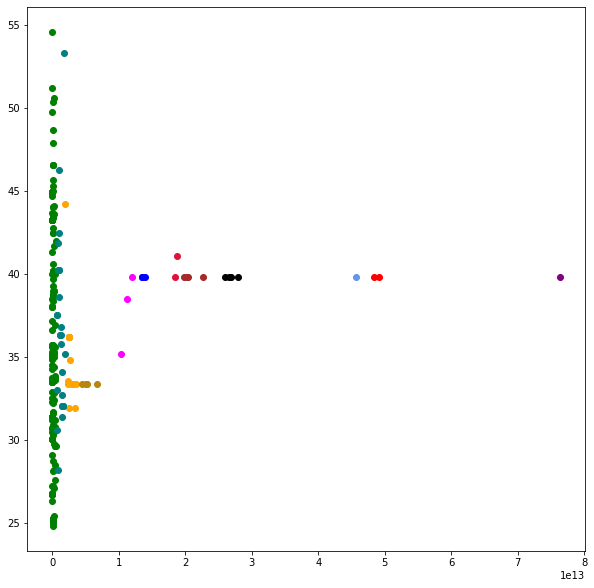

In [75]:
nd0=new_data[new_data.cluster==0]
nd1=new_data[new_data.cluster==1]
nd2=new_data[new_data.cluster==2]
nd3=new_data[new_data.cluster==3]
nd4=new_data[new_data.cluster==4]
nd5=new_data[new_data.cluster==5]
nd6=new_data[new_data.cluster==6]
nd7=new_data[new_data.cluster==7]
nd8=new_data[new_data.cluster==8]
nd9=new_data[new_data.cluster==9]
nd10=new_data[new_data.cluster==10]
nd11=new_data[new_data.cluster==11]


plt.scatter(nd0.GDP,nd0['Corruption_Index'],color='green')
plt.scatter(nd1.GDP,nd1['Corruption_Index'],color='red')
plt.scatter(nd2.GDP,nd2['Corruption_Index'],color='black')
plt.scatter(nd3.GDP,nd3['Corruption_Index'],color='blue')
plt.scatter(nd4.GDP,nd4['Corruption_Index'],color='purple')
plt.scatter(nd5.GDP,nd5['Corruption_Index'],color='orange')
plt.scatter(nd6.GDP,nd6['Corruption_Index'],color='brown')
plt.scatter(nd7.GDP,nd7['Corruption_Index'],color='darkgoldenrod')
plt.scatter(nd8.GDP,nd8['Corruption_Index'],color='teal')
plt.scatter(nd9.GDP,nd9['Corruption_Index'],color='magenta')
plt.scatter(nd10.GDP,nd10['Corruption_Index'],color='crimson')
plt.scatter(nd11.GDP,nd11['Corruption_Index'],color='cornflowerblue')

In [24]:
#Isolating data by clusters

**PART 0**

In [78]:
part0=new_data.query("cluster==0")
part0

,Corruption_Index,GDP,cluster
0,44.95,2.983637e+09,0
2,30.45,1.811656e+10,0
4,35.00,1.011240e+11,0
5,33.70,1.186120e+10,0
6,44.95,2.896679e+09,0
...,...,...,...
261,26.70,6.682833e+09,0
262,44.05,3.131737e+10,0
263,33.60,3.235860e+11,0
264,30.05,2.095841e+10,0


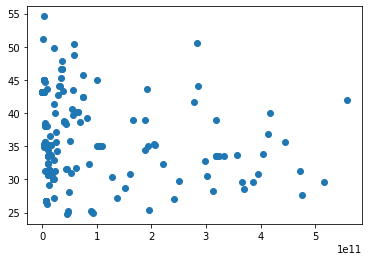

In [79]:
plt.scatter(part0.GDP,part0.Corruption_Index)

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [92]:
x=part0['GDP'].values
y=part0['Corruption_Index'].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [120]:
poly = PolynomialFeatures(degree=25)
x_poly= poly.fit_transform(x)
y_poly=poly.fit_transform(y)

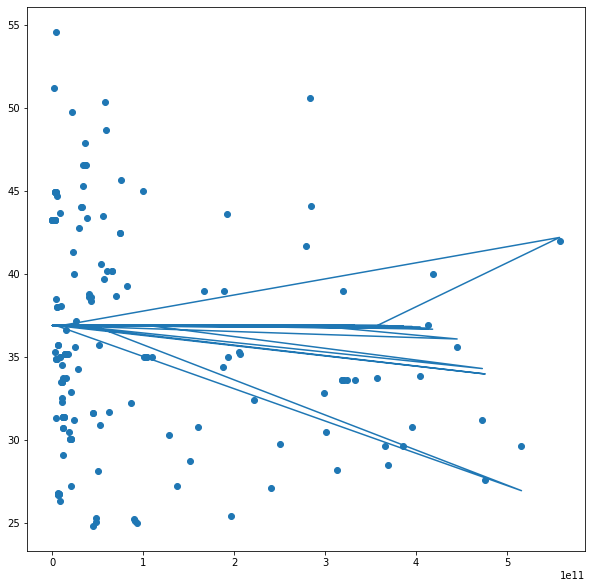

In [124]:
model1 = LinearRegression()
model1.fit(x_poly,y)
y_pred=model1.predict(x_poly)

plt.scatter(part0.GDP,part0.Corruption_Index)
plt.plot(x,y_pred)
plt.rcParams['figure.figsize'] = [0.1, 0.1]

**PART 1**

In [27]:
part1=new_data.query("cluster==1")
part1

,Corruption_Index,GDP,cluster
95,39.8,4.908650e+13,1
181,39.8,4.839800e+13,1


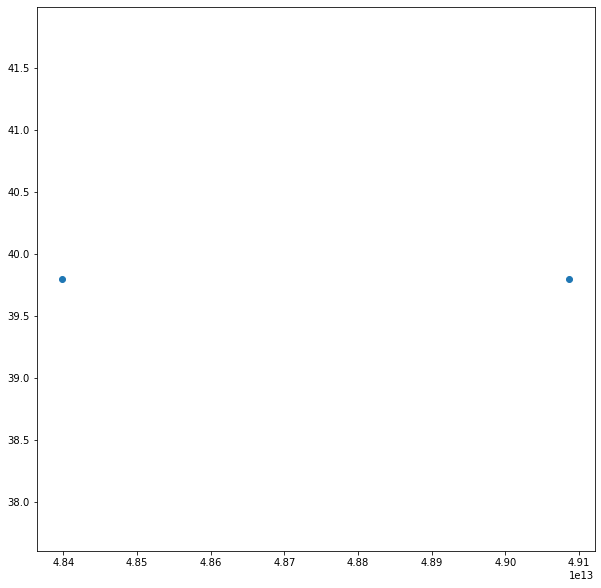

In [129]:
plt.scatter(part1.GDP,part1.Corruption_Index)

In [135]:
from sklearn import linear_model

In [139]:
x1=part1['GDP'].values
y1=part1['Corruption_Index'].values

x1=x1.reshape(-1,1)
y1=y1.reshape(-1,1)

In [143]:
reg=linear_model.LinearRegression()
g = reg.fit(x1,y1)
g

LinearRegression()

In [154]:
y1_pred=reg.predict(x1)

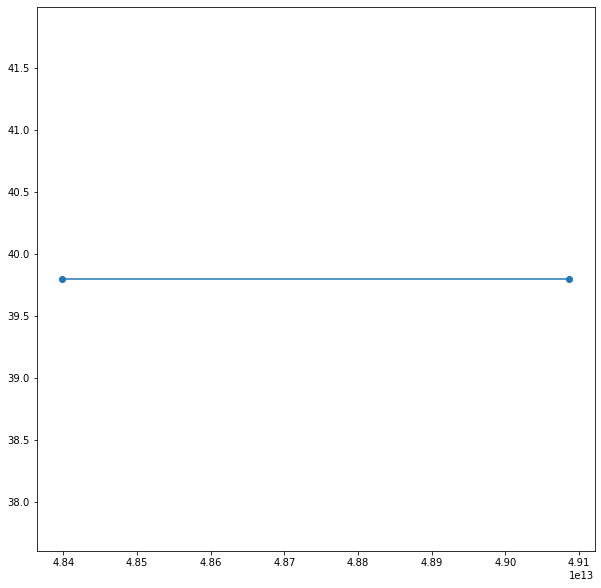

In [156]:
plt.scatter(x1,y1)
plt.plot(x1,y1_pred)
plt.show()

**PART 2**

In [29]:
part2=new_data.query("cluster==2")
part2

,Corruption_Index,GDP,cluster
102,39.8,2.598580e+13,2
103,39.8,2.794270e+13,2
140,39.8,2.694400e+13,2
156,39.8,2.655800e+13,2


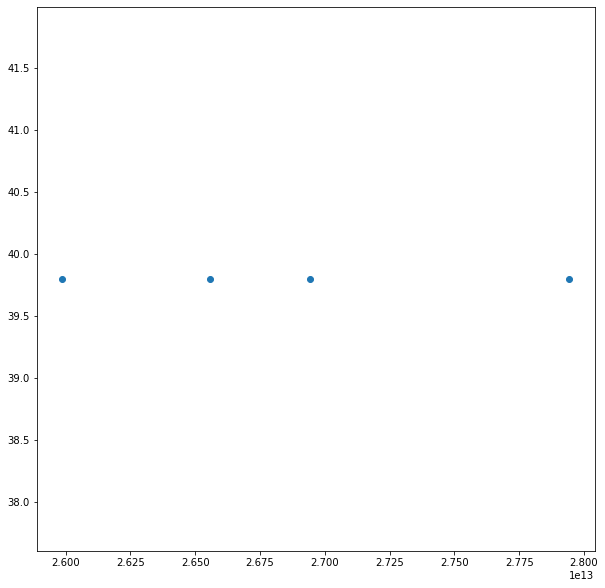

In [157]:
plt.scatter(part2.GDP,part2.Corruption_Index)

In [158]:
x2=part2['GDP'].values
y2=part2['Corruption_Index'].values

x2=x2.reshape(-1,1)
y2=y2.reshape(-1,1)

In [159]:
reg1=linear_model.LinearRegression()
g1 = reg.fit(x1,y1)
g1

LinearRegression()

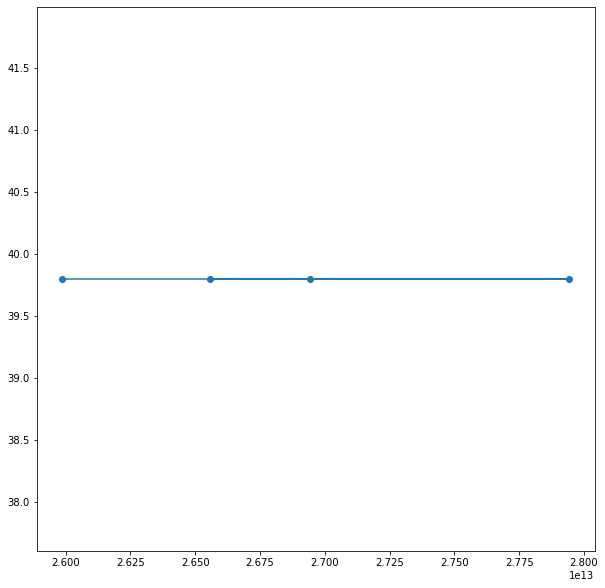

In [161]:
y2_pred=reg.predict(x2)

plt.scatter(x2,y2)
plt.plot(x2,y2_pred)
plt.show()

**PART 3**

In [31]:
part3=new_data.query("cluster==3")
part3

,Corruption_Index,GDP,cluster
61,39.8,1.356020e+13,3
73,39.8,1.388520e+13,3
230,39.8,1.354290e+13,3


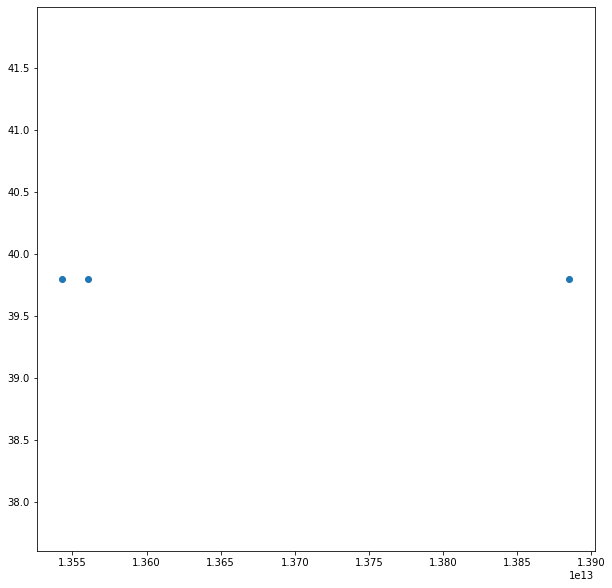

In [162]:
plt.scatter(part3.GDP,part3.Corruption_Index)

In [163]:
x3=part3['GDP'].values
y3=part3['Corruption_Index'].values

x3=x3.reshape(-1,1)
y3=y3.reshape(-1,1)

In [164]:
reg2=linear_model.LinearRegression()
g2 = reg.fit(x3,y3)
g2

LinearRegression()

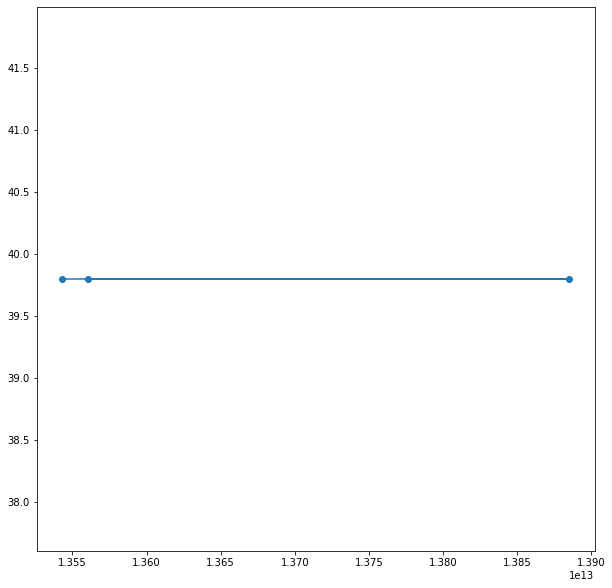

In [165]:
y3_pred=reg.predict(x3)

plt.scatter(x3,y3)
plt.plot(x3,y3_pred)
plt.show()

**PART 4**

In [33]:
part4=new_data.query("cluster==4")
part4

,Corruption_Index,GDP,cluster
259,39.8,7.629400e+13,4


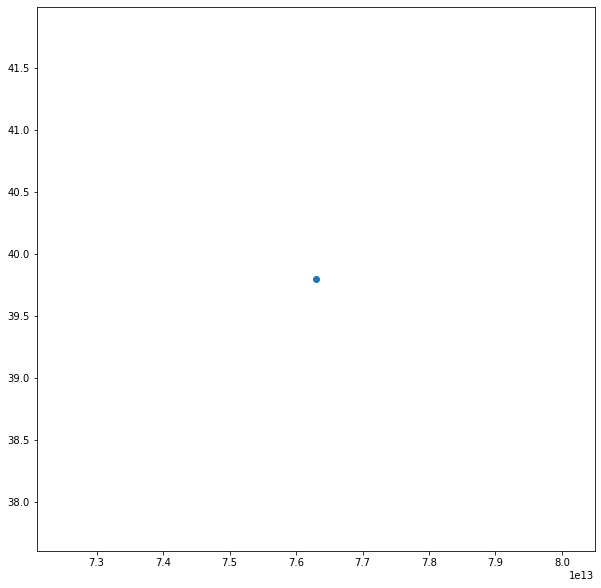

In [166]:
plt.scatter(part4.GDP,part4.Corruption_Index)

In [167]:
x4=part4['GDP'].values
y4=part4['Corruption_Index'].values

x4=x4.reshape(-1,1)
y4=y4.reshape(-1,1)

In [169]:
reg3=linear_model.LinearRegression()
g3 = reg.fit(x4,y4)
g3

LinearRegression()

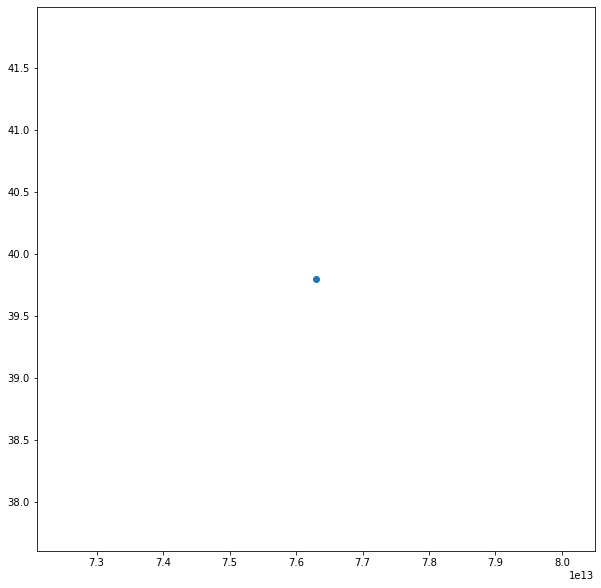

In [170]:
y4_pred=reg.predict(x4)

plt.scatter(x4,y4)
plt.plot(x4,y4_pred)
plt.show() #point singularity causes 0 slope and no line

**PART 5**

In [35]:
part5=new_data.query("cluster==5")
part5

,Corruption_Index,GDP,cluster
7,33.350000,2.400960e+12,5
38,36.228395,2.447089e+12,5
55,31.900000,3.467500e+12,5
64,33.350000,2.965860e+12,5
69,36.228395,2.447089e+12,5
77,31.900000,2.471290e+12,5
81,34.800000,2.722850e+12,5
84,36.228395,2.447089e+12,5
104,44.250000,1.956760e+12,5
109,33.550000,2.294800e+12,5


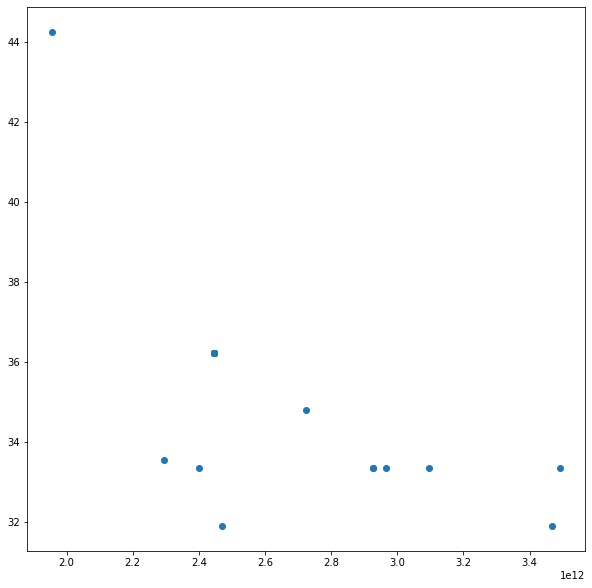

In [171]:
plt.scatter(part5.GDP,part5.Corruption_Index)

In [172]:
x5=part5['GDP'].values
y5=part5['Corruption_Index'].values
x5=x5.reshape(-1,1)
y5=y5.reshape(-1,1)

In [191]:
poly1 = PolynomialFeatures(degree=1)
x5_poly= poly1.fit_transform(x5)
y5_poly=poly1.fit_transform(y5)

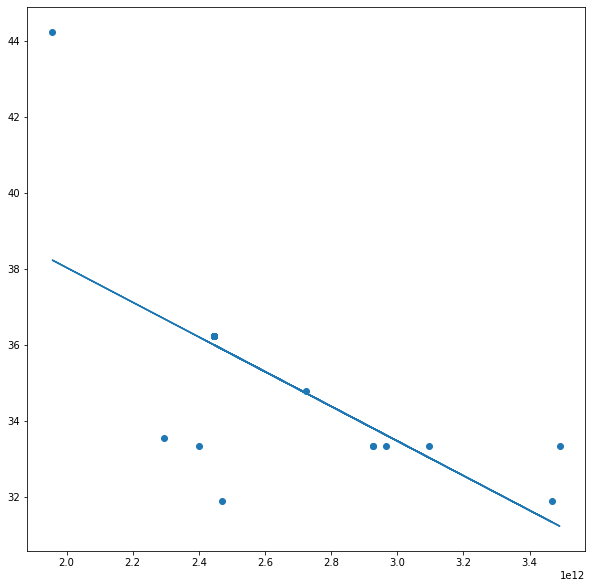

In [192]:
model2 = LinearRegression()
model2.fit(x5_poly,y5)
y_pred1=model2.predict(x5_poly)

plt.scatter(part5.GDP,part5.Corruption_Index)
plt.plot(x5,y_pred1)

**PART 6**

In [37]:
part6=new_data.query("cluster==6")
part6

,Corruption_Index,GDP,cluster
63,39.8,2.272070e+13,6
65,39.8,2.044560e+13,6
170,39.8,2.028000e+13,6
249,39.8,1.982060e+13,6


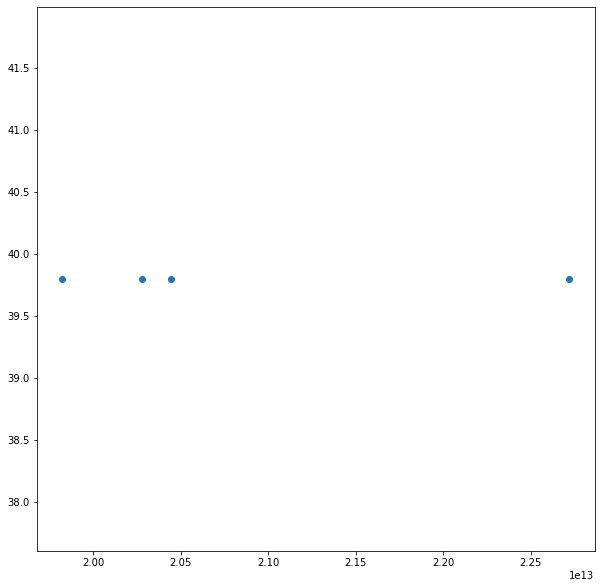

In [193]:
plt.scatter(part6.GDP,part6.Corruption_Index)

In [194]:
x6=part6['GDP'].values
y6=part6['Corruption_Index'].values

x6=x6.reshape(-1,1)
y6=y6.reshape(-1,1)

In [195]:
reg5=linear_model.LinearRegression()
g6 = reg5.fit(x6,y6)
g6

LinearRegression()

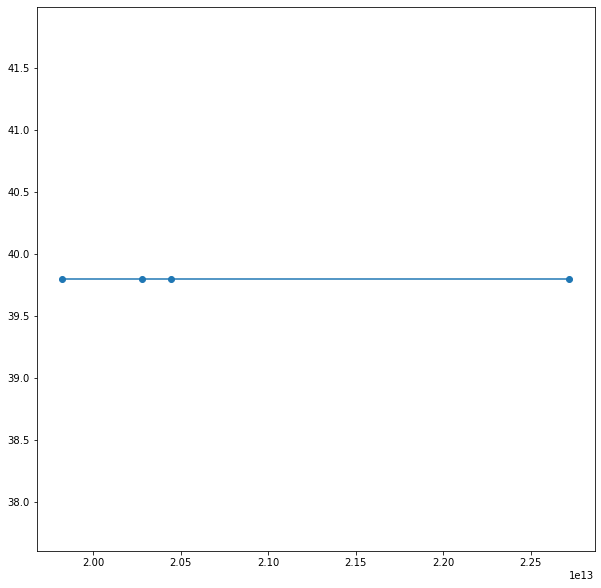

In [197]:
y6_pred=reg5.predict(x6)

plt.scatter(x6,y6)
plt.plot(x6,y6_pred)
plt.show()

**PART 7**

In [198]:
part7=new_data.query("cluster==7")
part7

,Corruption_Index,GDP,cluster
119,33.35,5.003680e+12,7
128,33.35,4.527260e+12,7
134,33.35,5.249210e+12,7
139,33.35,6.737460e+12,7
236,33.35,5.014500e+12,7


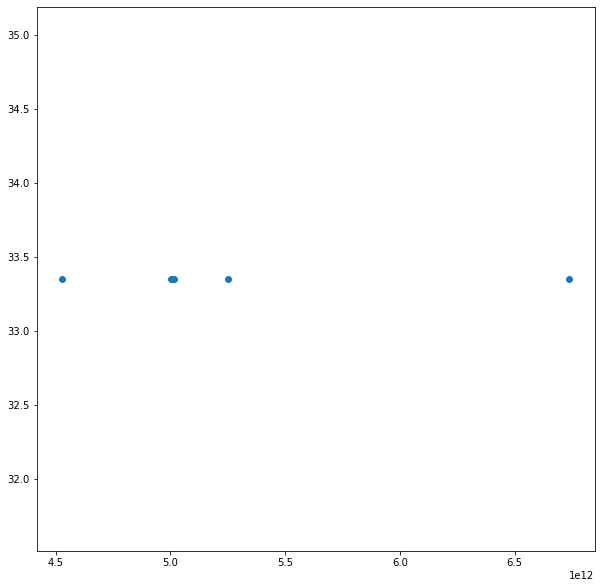

In [207]:
plt.scatter(part7.GDP,part7.Corruption_Index)

In [211]:
x7=part7['GDP'].values
y7=part7['Corruption_Index'].values

x7=x7.reshape(-1,1)
y7=y7.reshape(-1,1)

In [209]:
reg6=linear_model.LinearRegression()
g7 = reg6.fit(x7,y7)
g7

LinearRegression()

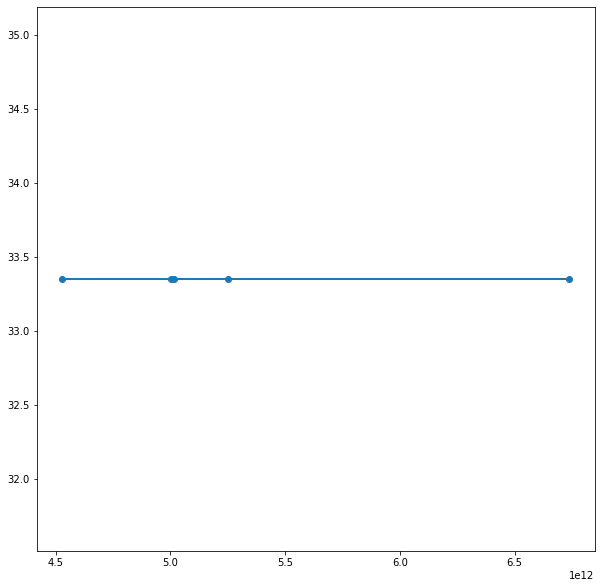

In [212]:
y7_pred=reg6.predict(x7)

plt.scatter(x7,y7)
plt.plot(x7,y7_pred)
plt.show()

**PART 8**

In [41]:
part8=new_data.query("cluster==8")
part8

,Corruption_Index,GDP,cluster
1,40.25,8.720230e+11,8
3,30.60,6.905430e+11,8
13,36.30,1.206690e+12,8
29,53.30,1.795690e+12,8
35,32.70,1.527990e+12,8
36,36.30,1.321410e+12,8
37,33.00,6.956010e+11,8
70,35.80,1.232080e+12,8
74,32.05,1.406200e+12,8
98,37.50,6.671630e+11,8


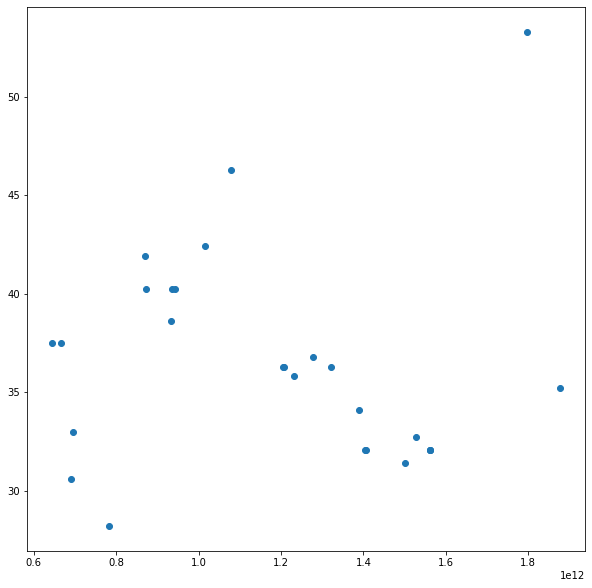

In [213]:
plt.scatter(part8.GDP,part8.Corruption_Index)

In [214]:
x8=part8['GDP'].values
y8=part8['Corruption_Index'].values
x8=x8.reshape(-1,1)
y8=y8.reshape(-1,1)

In [226]:
poly2 = PolynomialFeatures(degree=3)
x8_poly= poly2.fit_transform(x8)
y8_poly=poly2.fit_transform(y8)

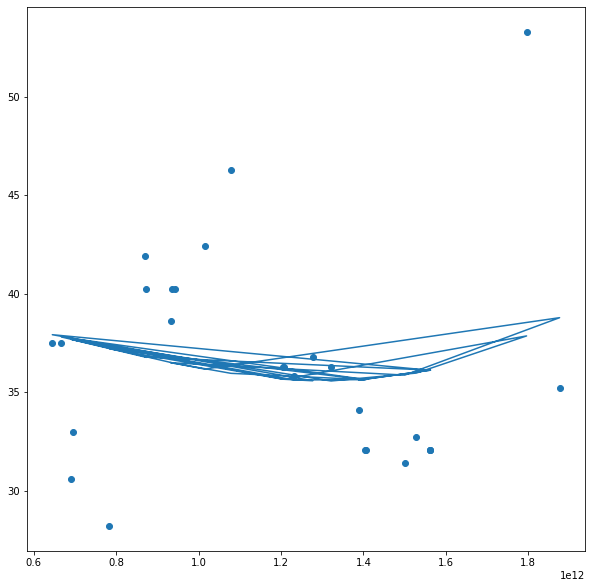

In [227]:
model3 = LinearRegression()
model3.fit(x8_poly,y8)
y_pred2=model3.predict(x8_poly)

plt.scatter(part8.GDP,part8.Corruption_Index)
plt.plot(x8,y_pred2)

**PART 9**

In [43]:
part9=new_data.query("cluster==9")
part9

,Corruption_Index,GDP,cluster
40,38.5,1.123330e+13,9
62,35.2,1.030780e+13,9
68,39.8,1.196450e+13,9


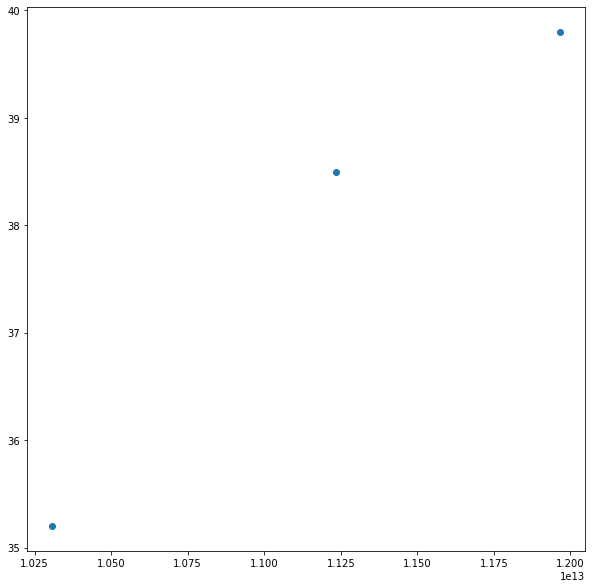

In [228]:
plt.scatter(part9.GDP,part9.Corruption_Index)

In [229]:
x9=part9['GDP'].values
y9=part9['Corruption_Index'].values

x9=x9.reshape(-1,1)
y9=y9.reshape(-1,1)

In [242]:
poly3 = PolynomialFeatures(degree=1)
x9_poly= poly3.fit_transform(x9)
y9_poly=poly3.fit_transform(y9)

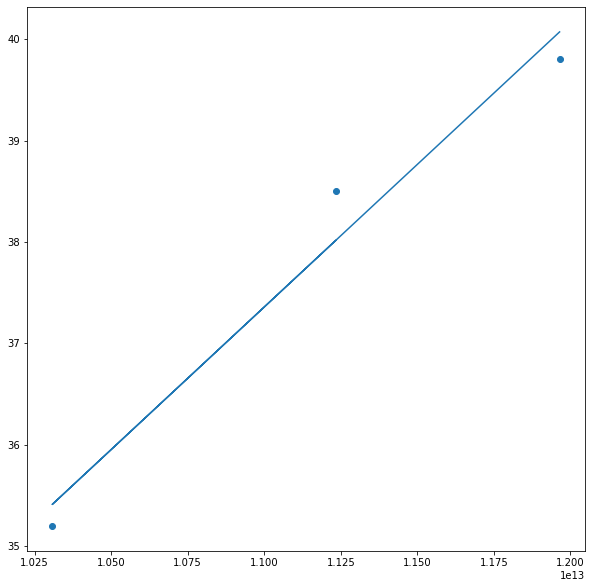

In [243]:
model4 = LinearRegression()
model4.fit(x9_poly,y9)
y_pred3=model4.predict(x9_poly)

plt.scatter(part9.GDP,part9.Corruption_Index)
plt.plot(x9,y_pred3)

**PART 10**

In [45]:
part10=new_data.query("cluster==10")
part10

,Corruption_Index,GDP,cluster
142,39.8,1.851050e+13,10
251,41.1,1.874510e+13,10


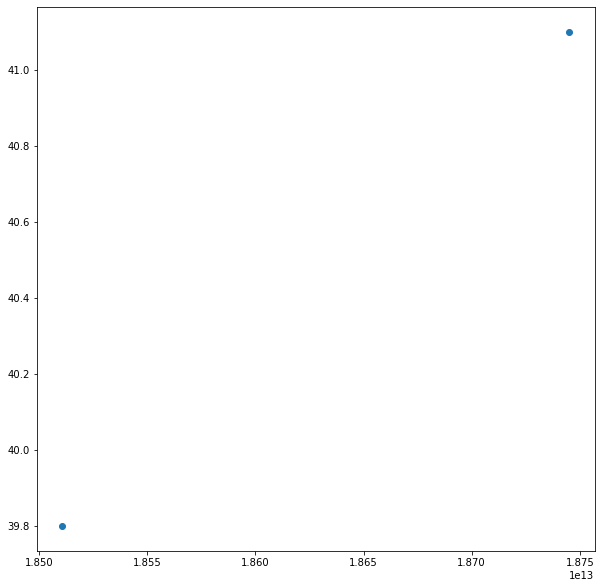

In [245]:
plt.scatter(part10.GDP,part10.Corruption_Index)

In [246]:
x10=part10['GDP'].values
y10=part10['Corruption_Index'].values

x10=x10.reshape(-1,1)
y10=y10.reshape(-1,1)

In [248]:
reg9=linear_model.LinearRegression()
g10 = reg9.fit(x10,y10)
g10

LinearRegression()

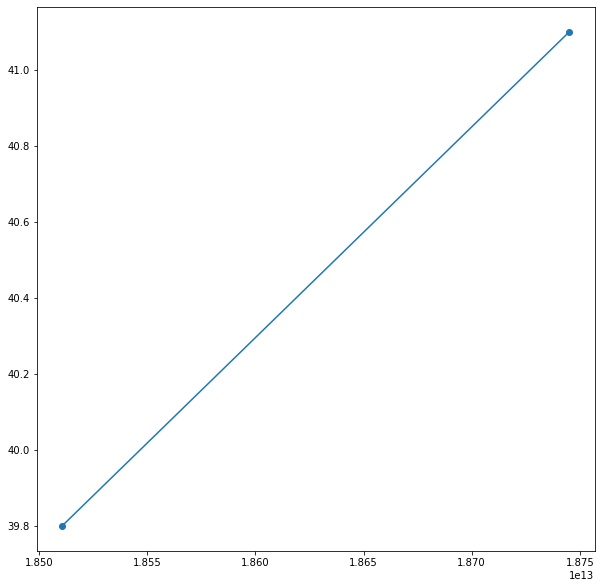

In [249]:
y10_pred=reg9.predict(x10)

plt.scatter(x10,y10)
plt.plot(x10,y10_pred)
plt.show()

**PART 11**

In [47]:
part11=new_data.query("cluster==11")
part11

,Corruption_Index,GDP,cluster
198,39.8,4.566310e+13,11


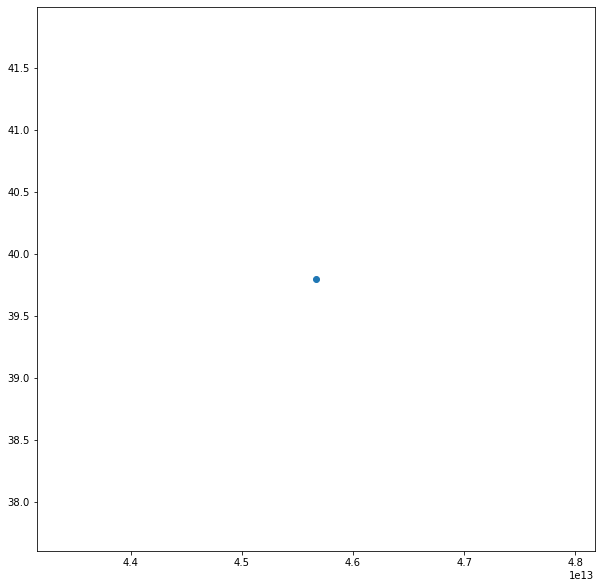

In [250]:
plt.scatter(part11.GDP,part11.Corruption_Index)

In [252]:
x11=part11['GDP'].values
y11=part11['Corruption_Index'].values

x11=x11.reshape(-1,1)
y11=y11.reshape(-1,1)

In [253]:
reg10=linear_model.LinearRegression()
g11 = reg10.fit(x11,y11)
g11

LinearRegression()

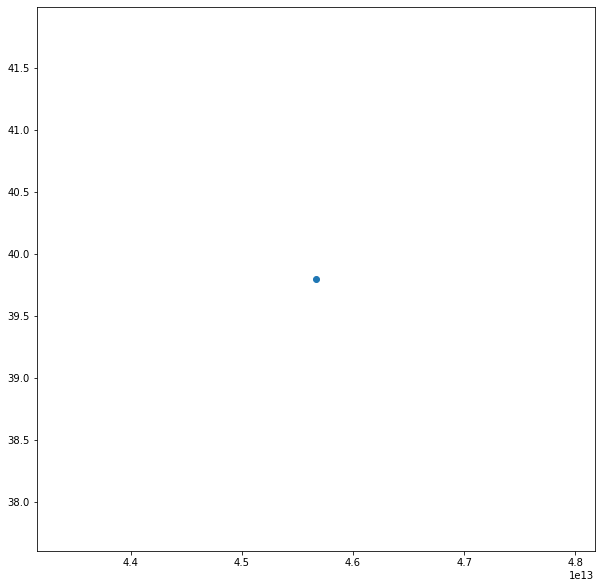

In [254]:
y11_pred=reg10.predict(x11)

plt.scatter(x11,y11)
plt.plot(x11,y11_pred)
plt.show() #Slope is unavailable due to singularity of this cluster

# **Summary of Local Regression Decisions**

***1. Part 0: Polynomial Regression (Degree 25)***

***2.Part 1: Linear Regression***

***3.Part 2: Linear Regression***

***4.Part 3: Linear Regression***

***5.Part 4: Linear Regression***

***6.Part 5: Polynomial Regression (Degree 1)***

***7.Part 6: Linear Regression***

***8.Part 7: Linear Regression***

***9.Part 8: Polynomial Regression (Degree 3)***

***10.Part 9: Polynomial Regression (Degree 1)***

***11.Part 10: Linear Regression***

***12.Part 11: Linear Regression***

# *Argument for not using a linear-tree*

Using a linear-tree would give generalized linear model for every local cluster creating higher amount of bias due to ignored squared errors. This is the reason why Polynomial regressions have been used in clusters 0 (d=25),5 (d=1),8 (d=3),9 (d=1) where degree valuations are based on experimental visualization where the best attempt has been made to avoid under-fitting and over-fitting. 

Furthermore, it might seem redundant that linear regressions have been applied on singular data cluster regions, however they are more of an indicator of segmentation of various regions. If k-valuation during clustering process was lowered then elbow method would have been violated where the kink exists, but beyond this k-clustering reduction doesn't gurantee the uniformity of a higher k-clustering pattern. In simple terms, if current k-clustering=12 was reduced to, say k=11 then all  cluster patterns would change, which would result in further scientific skewing of computation.